# SkAI - AlexNet and ResNet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Prepare Train and Test Images

In [ ]:
from prepare_images import prepare_images
prepare_images()

## Prepare DataLoaders

In [ ]:
from prepare_data_loaders import prepare_data_loaders
dataloaders, class_to_idx = prepare_data_loaders()

## AlexNet Model

In [ ]:
from initialize_model import initialize_model
from train_model import train_model
import torch
from torch import nn
from torch import optim
from config import ALEXNET_EPOCHS

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = initialize_model('alexnet', device, True, True)

params_to_update = model.parameters()
print("Params to learn:")
feature_extract = True
if feature_extract:
    params_to_update = []
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Setup the loss fxn
criterion = nn.CrossEntropyLoss()
# Set optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)
trained_model_an, train_loss_history_an, val_loss_history_an, train_acc_history_an, val_acc_history_an = train_model(model, device, dataloaders, criterion, optimizer, ALEXNET_EPOCHS)

Params to learn:
	 classifier.fc1.weight
	 classifier.fc1.bias
	 classifier.fc2.weight
	 classifier.fc2.bias
Epoch 0/50
----------
train Loss: 13.8792 Acc: 0.3680
val Loss: 2.3581 Acc: 0.6154

Epoch 1/50
----------
train Loss: 3.0791 Acc: 0.5440
val Loss: 1.4032 Acc: 0.5705

Epoch 2/50
----------
train Loss: 1.2348 Acc: 0.6040
val Loss: 0.8680 Acc: 0.6923

Epoch 3/50
----------
train Loss: 0.8480 Acc: 0.6712
val Loss: 0.7927 Acc: 0.6731

Epoch 4/50
----------
train Loss: 0.6188 Acc: 0.7544
val Loss: 0.6459 Acc: 0.7115

Epoch 5/50
----------
train Loss: 0.5544 Acc: 0.7792
val Loss: 0.5864 Acc: 0.7244

Epoch 6/50
----------
train Loss: 0.4925 Acc: 0.8048
val Loss: 0.5670 Acc: 0.7372

Epoch 7/50
----------
train Loss: 0.4259 Acc: 0.8360
val Loss: 0.5349 Acc: 0.7500

Epoch 8/50
----------
train Loss: 0.3996 Acc: 0.8392
val Loss: 0.5163 Acc: 0.7756

Epoch 9/50
----------
train Loss: 0.3530 Acc: 0.8656
val Loss: 0.4801 Acc: 0.8013

Epoch 10/50
----------
train Loss: 0.3263 Acc: 0.8664
val Lo

## ResNet Model

In [ ]:
from initialize_model import initialize_model
from train_model import train_model
import torch
from torch import nn
from torch import optim
from config import RESNET_EPOCHS

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = initialize_model('resnet', device, True, True)

params_to_update = model.parameters()
print("Params to learn:")
feature_extract = True
if feature_extract:
    params_to_update = []
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Setup the loss fxn
criterion = nn.CrossEntropyLoss()
# Set optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)
model.to(device)
trained_model_rn, train_loss_history_rn, val_loss_history_rn, train_acc_history_rn, val_acc_history_rn = train_model(model, device, dataloaders, criterion, optimizer, RESNET_EPOCHS)

Params to learn:
	 fc.0.weight
	 fc.0.bias
	 fc.2.weight
	 fc.2.bias
Epoch 0/50
----------
train Loss: 1.0750 Acc: 0.4240
val Loss: 1.0551 Acc: 0.4359

Epoch 1/50
----------
train Loss: 1.0419 Acc: 0.4352
val Loss: 1.0317 Acc: 0.4423

Epoch 2/50
----------
train Loss: 1.0151 Acc: 0.4680
val Loss: 1.0066 Acc: 0.5897

Epoch 3/50
----------
train Loss: 0.9904 Acc: 0.5568
val Loss: 0.9762 Acc: 0.5833

Epoch 4/50
----------
train Loss: 0.9594 Acc: 0.5352
val Loss: 0.9483 Acc: 0.5641

Epoch 5/50
----------
train Loss: 0.9356 Acc: 0.5808
val Loss: 0.9192 Acc: 0.6474

Epoch 6/50
----------
train Loss: 0.9094 Acc: 0.6744
val Loss: 0.8948 Acc: 0.6282

Epoch 7/50
----------
train Loss: 0.8887 Acc: 0.6168
val Loss: 0.8752 Acc: 0.6154

Epoch 8/50
----------
train Loss: 0.8617 Acc: 0.6864
val Loss: 0.8530 Acc: 0.6603

Epoch 9/50
----------
train Loss: 0.8432 Acc: 0.7016
val Loss: 0.8362 Acc: 0.6474

Epoch 10/50
----------
train Loss: 0.8180 Acc: 0.6800
val Loss: 0.8229 Acc: 0.6667

Epoch 11/50
-----

## Model Performance Analysis

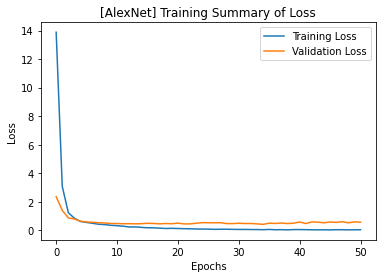

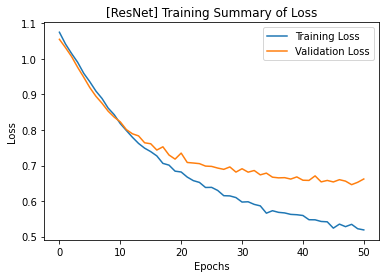

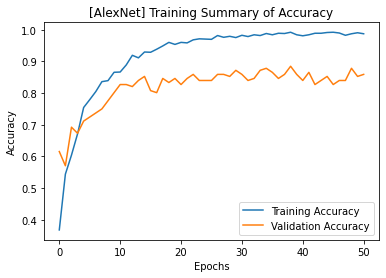

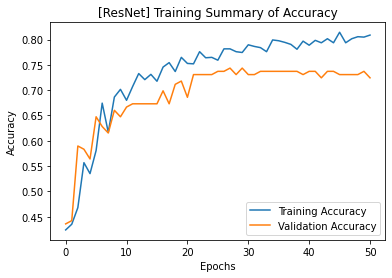

In [ ]:
from model_perf_analysis import model_perf_analysis

model_perf_analysis(train_loss_history_an, val_loss_history_an, 'Loss', '[AlexNet]')
model_perf_analysis(train_loss_history_rn, val_loss_history_rn, 'Loss', '[ResNet]')

model_perf_analysis([float(x) for x in train_acc_history_an], [float(x) for x in val_acc_history_an], 'Accuracy', '[AlexNet]')
model_perf_analysis([float(x) for x in train_acc_history_rn], [float(x) for x in val_acc_history_rn], 'Accuracy', '[ResNet]')

## Save Models

In [ ]:
from config import ROOT_MODELS_FOLDER, ALEXNET_MODEL_NAME, RESNET_MODEL_NAME

torch.save(trained_model_an.state_dict(), ROOT_MODELS_FOLDER + '/' + ALEXNET_MODEL_NAME)
torch.save(trained_model_rn.state_dict(), ROOT_MODELS_FOLDER + '/' +RESNET_MODEL_NAME)

## Test Accuracy Analysis

[AlexNet] Test Accuracy: 0.8679245114326477


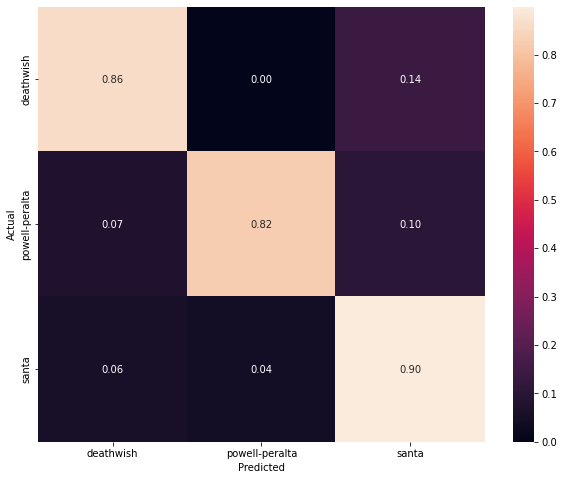

[ResNet] Test Accuracy: 0.74842768907547


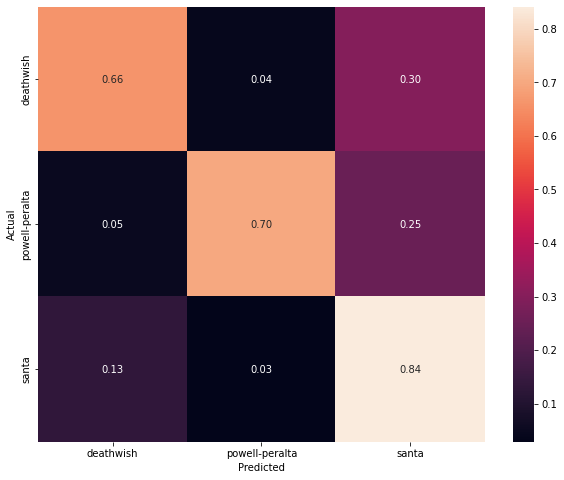

In [ ]:
from test_accuracy import test_accuracy

test_accuracy(trained_model_an, dataloaders, device, '[AlexNet]', list(class_to_idx.keys()))
test_accuracy(trained_model_rn, dataloaders, device, '[ResNet]', list(class_to_idx.keys()))

## Predict Deck Images

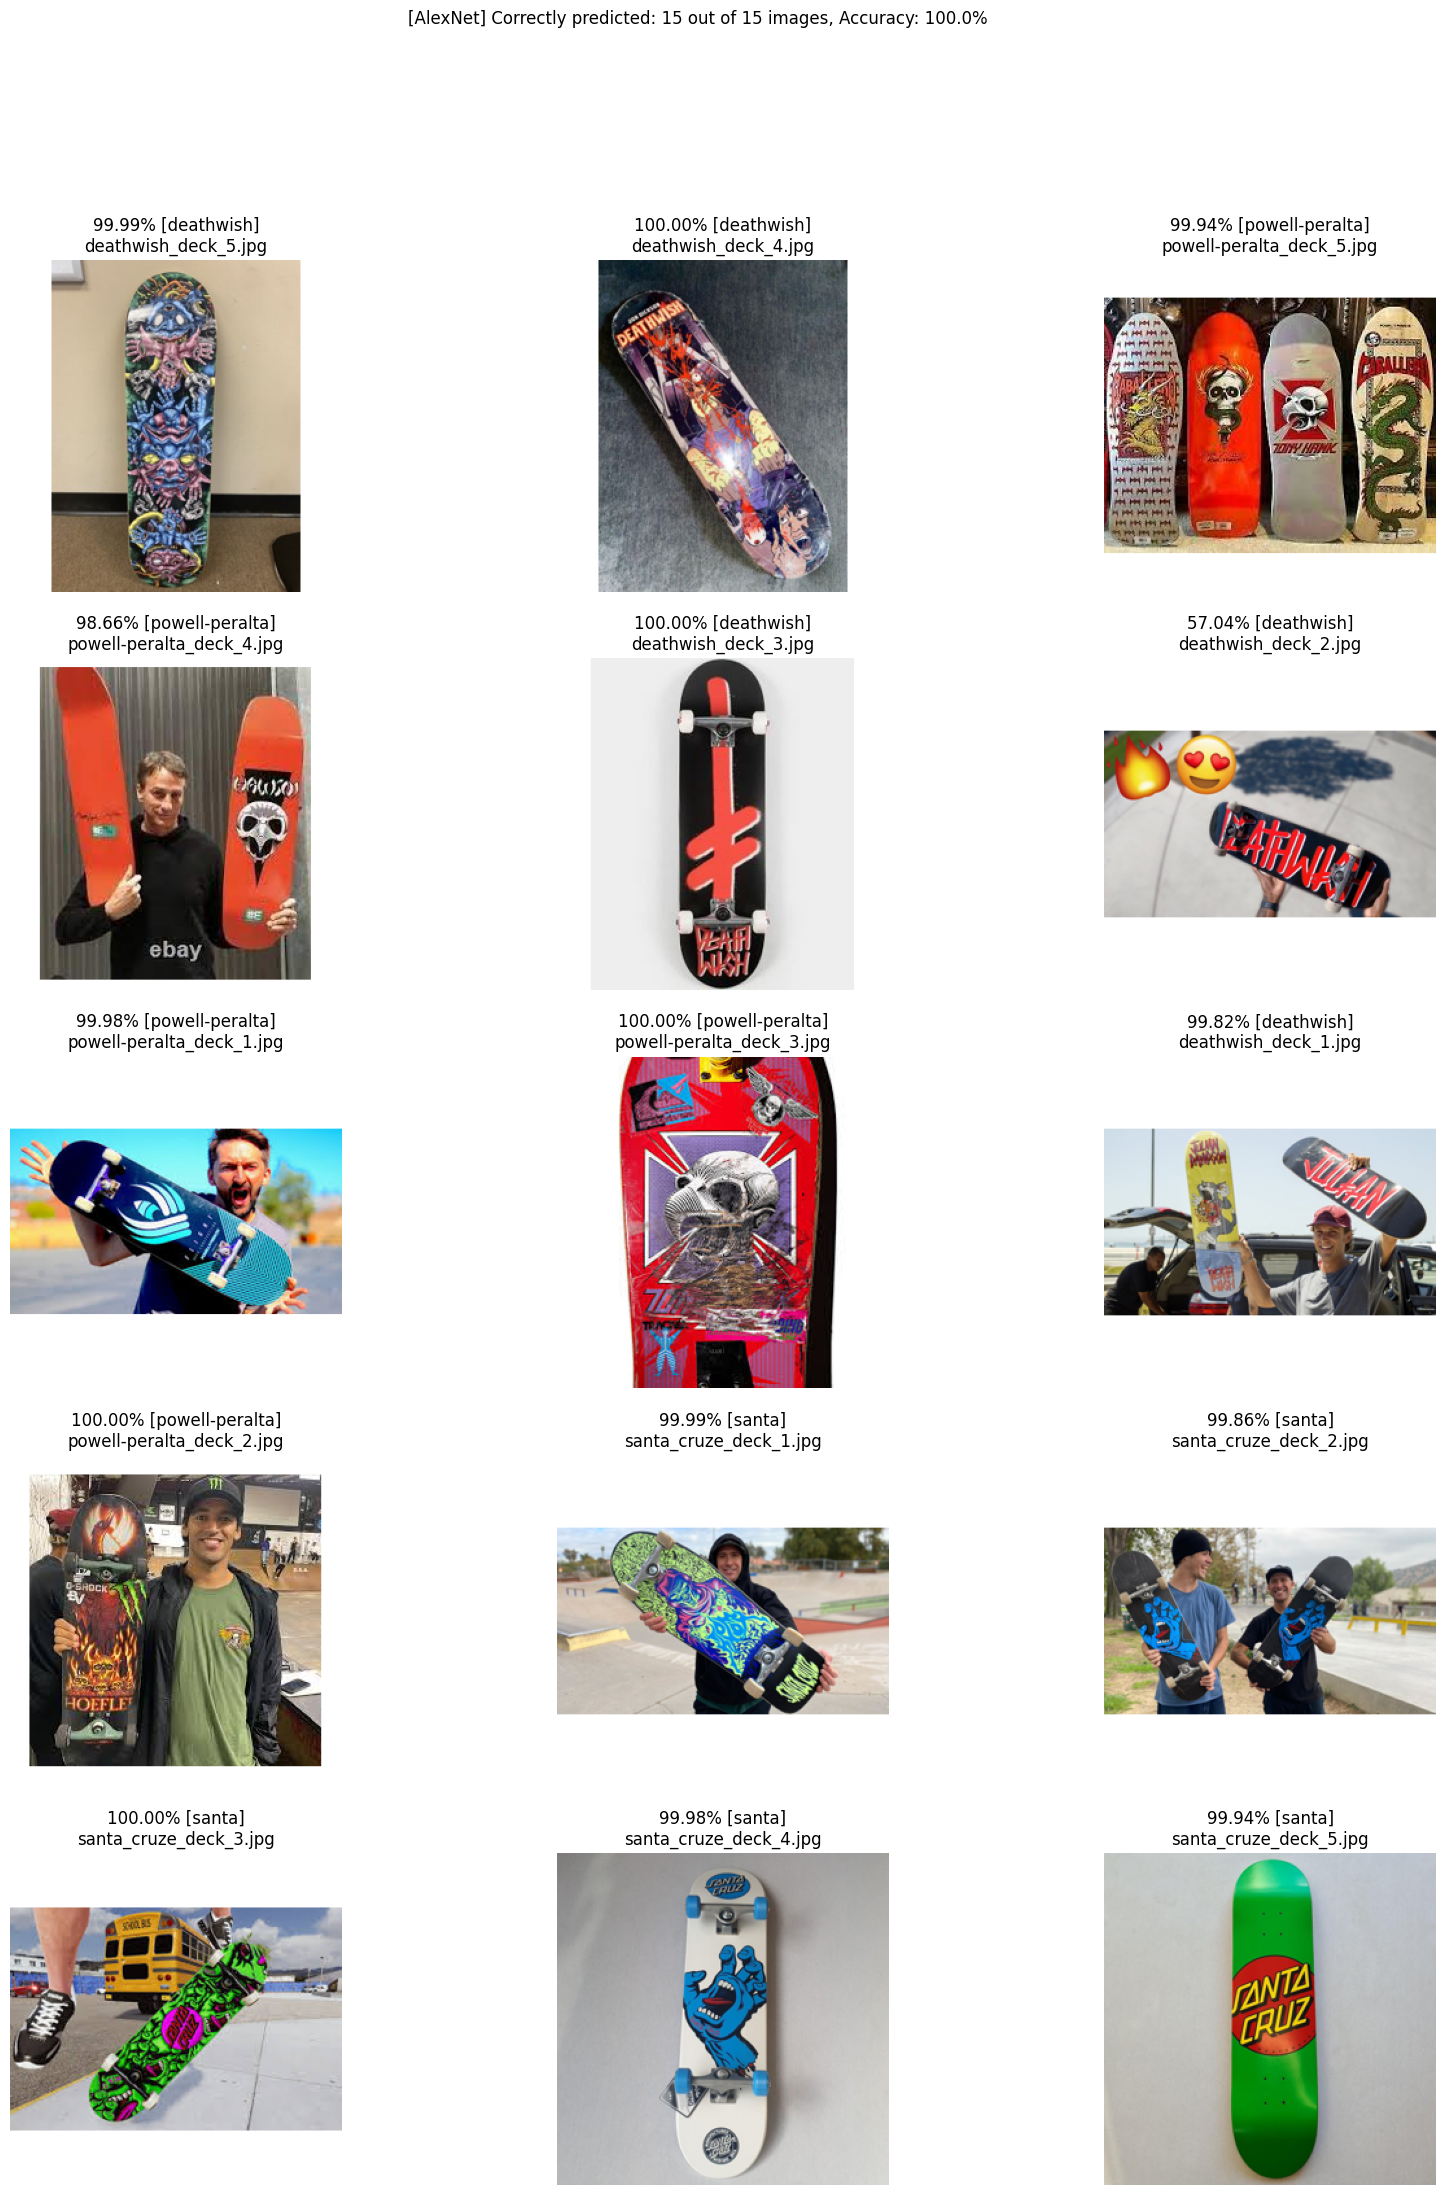

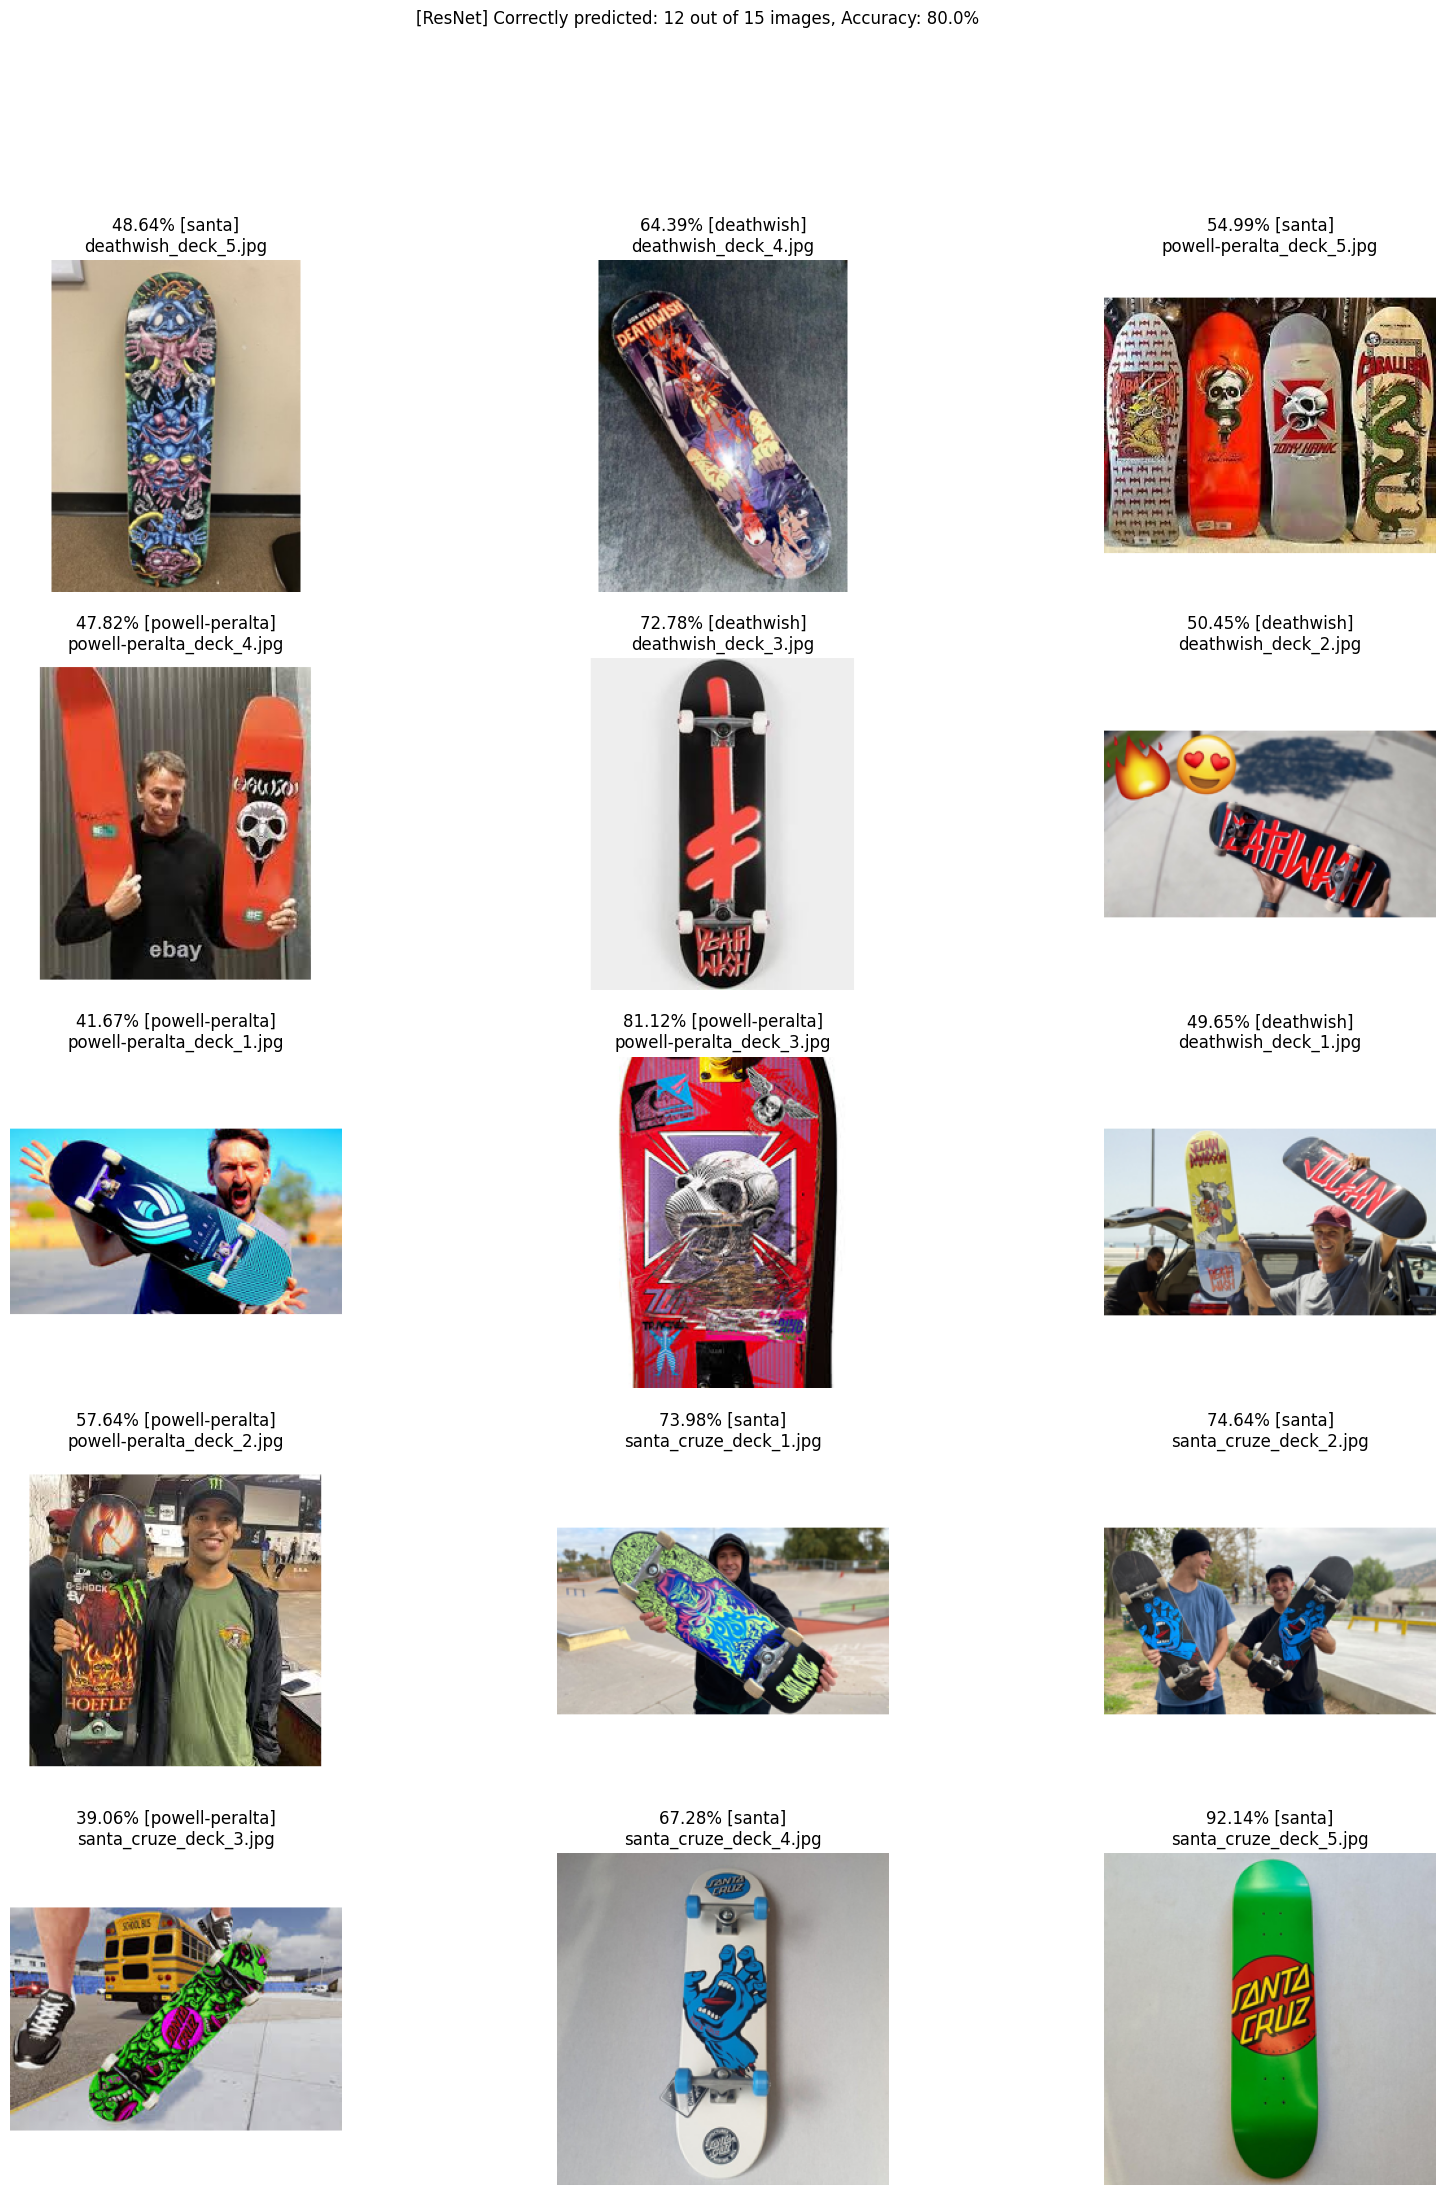

In [4]:
import torch
from initialize_model import initialize_model
from predict_deck_brands import predict_deck_brands
from config import ROOT_MODELS_FOLDER, ALEXNET_MODEL_NAME, RESNET_MODEL_NAME

# AlexNet
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
trained_model_an = initialize_model('alexnet', device, True, True)
trained_model_an.load_state_dict(torch.load(ROOT_MODELS_FOLDER + '/' + ALEXNET_MODEL_NAME, map_location=torch.device('cpu')))
predict_deck_brands('AlexNet', trained_model_an, device, {'deathwish': 0, 'powell-peralta': 1, 'santa': 2})

# ResNet
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
trained_model_rn = initialize_model('resnet', device, True, True)
trained_model_rn.load_state_dict(torch.load(ROOT_MODELS_FOLDER + '/' +RESNET_MODEL_NAME, map_location=torch.device('cpu')))
predict_deck_brands('ResNet', trained_model_rn, device, {'deathwish': 0, 'powell-peralta': 1, 'santa': 2})